In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df0 = pd.read_pickle(r'C:\code\HH_selkobot\evaluation_results_part2.pickle')

In [140]:
df = df0.copy()
texts = df['id'].to_list()
bots = (['_'.join(x.split('_')[1:]) for x in texts])
texts = ([x.split('_')[0] for x in texts])
print(f'{len(df)} samples with total {len(set(texts))} different texts')
text_id = set(texts)
df['sample'] = texts
df['bot']=bots

float_columns = [
    "e5_embed_score", "jina_embed_score", "SARI_score", "SARI_score_lemma",
    "openai_custom_score", "openai_embed_score", "openai_selkomittari_score", 
    "geval_score", "length_ratio"
]

# Convert columns
for col in float_columns:
    df[col] = df[col].astype(float)

# Convert other columns to string
df[['id', 'sample', 'bot']] = df[['id', 'sample', 'bot']].astype(str)

columns_of_interest = [
    "jina_embed_score", "SARI_score_lemma",
    "openai_custom_score", "openai_embed_score", "openai_selkomittari_score", 
    "geval_score", "length_ratio"
]
float_columns = [x for x in float_columns if x in columns_of_interest]

df = df[columns_of_interest + ['id', 'sample', 'bot']]

177 samples with total 20 different texts


In [141]:
grouped_df = df.groupby('bot')[float_columns].mean().reset_index()
grouped_df

,bot,jina_embed_score,SARI_score_lemma,openai_custom_score,openai_embed_score,openai_selkomittari_score,geval_score,length_ratio
0,Autogenbot_v1_(gpt-4o),0.916319,0.388242,83.933333,0.902886,2.947826,0.631396,0.879654
1,Autogenbot_v2_(gpt-4o),0.915896,0.408028,84.716667,0.903609,2.902174,0.651541,0.920181
2,Autogenbot_v2_examples_(gpt-4o),0.914465,0.415167,83.450000,0.899350,2.967391,0.631323,0.914407
3,Autogenbot_v2_small_(gpt-4o),0.919923,0.419148,85.766667,0.906619,2.936957,0.648857,0.930147
4,Autogenbot_v2_small_examples_(gpt-4o),0.914280,0.395362,83.964912,0.901081,2.972540,0.603517,0.883068
5,single_bot_selkomedia_9rule_(gpt-4o),0.892549,0.330440,78.833333,0.856770,2.928261,0.554812,0.573203
6,single_bot_selkomedia_simple_(gpt-4o),0.923661,0.466285,84.473684,0.901408,2.549199,0.718766,1.105185
7,single_bot_v2_(gpt-4o),0.904569,0.402971,83.473684,0.885664,2.876430,0.581590,0.885830
8,single_bot_v2_examples_(gpt-4o),0.922692,0.440803,86.066667,0.908176,2.902174,0.677312,0.975166


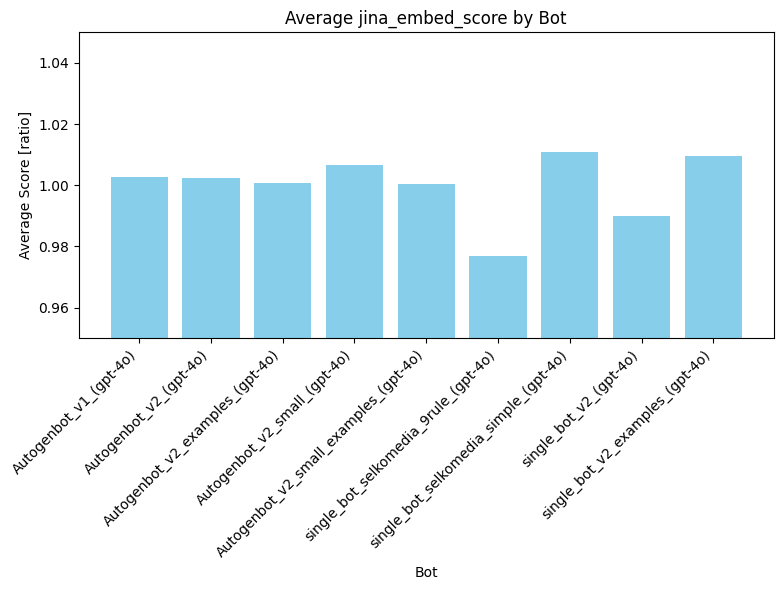

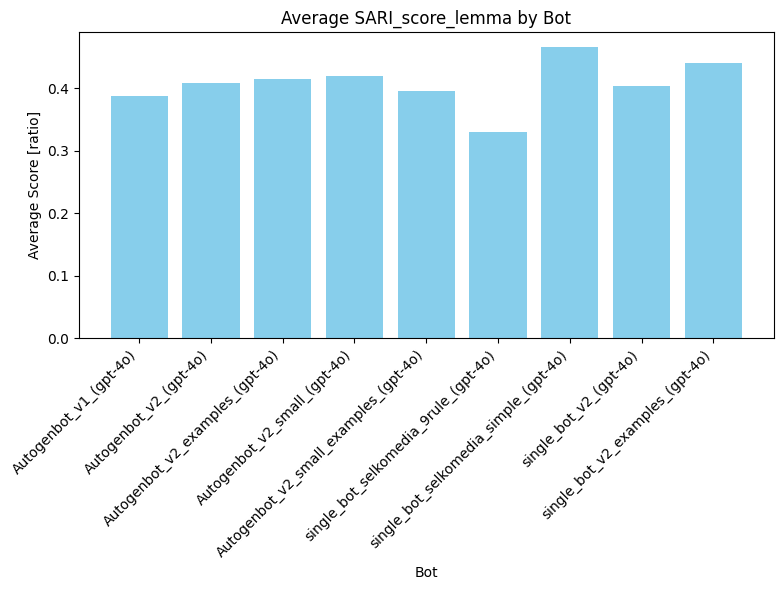

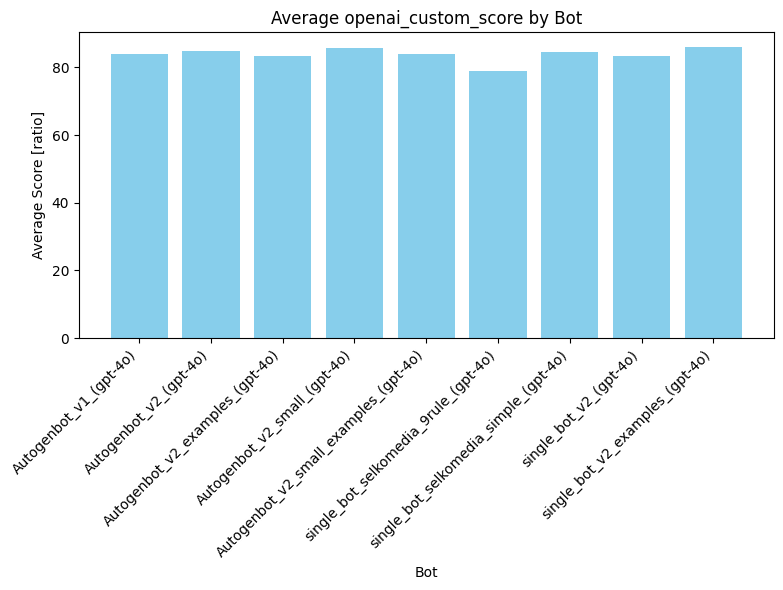

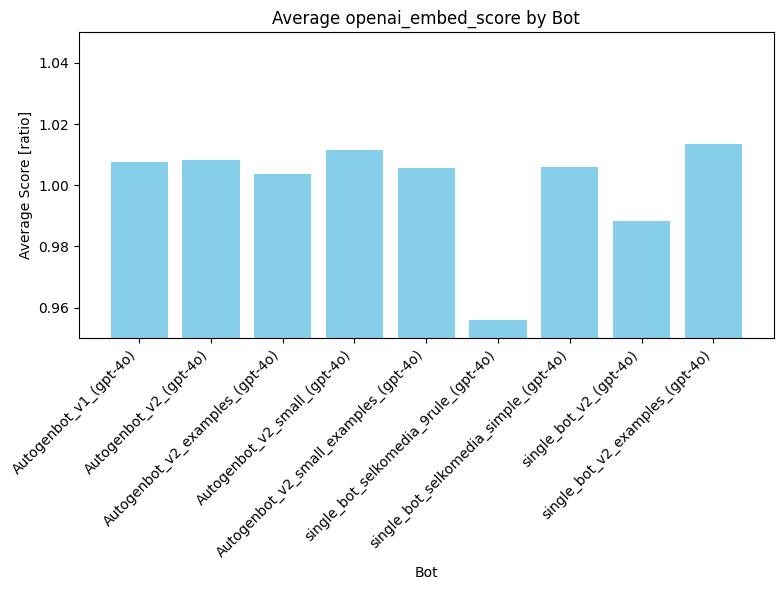

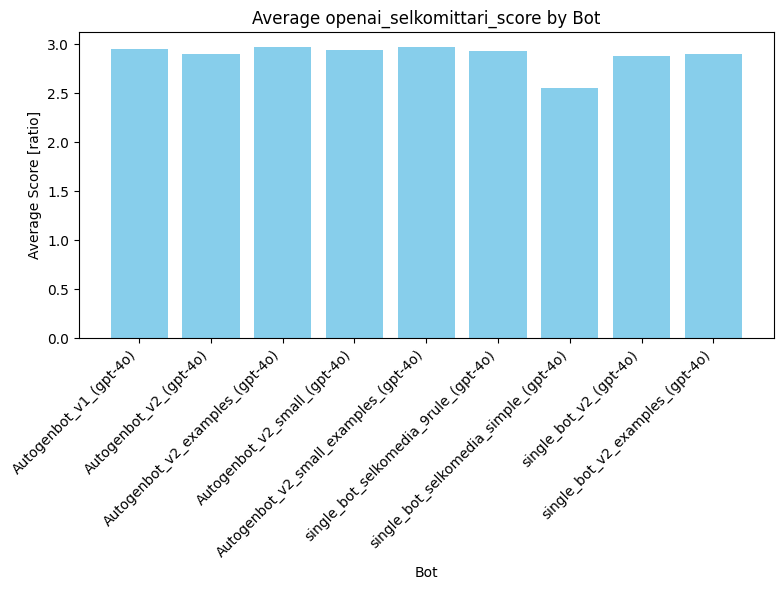

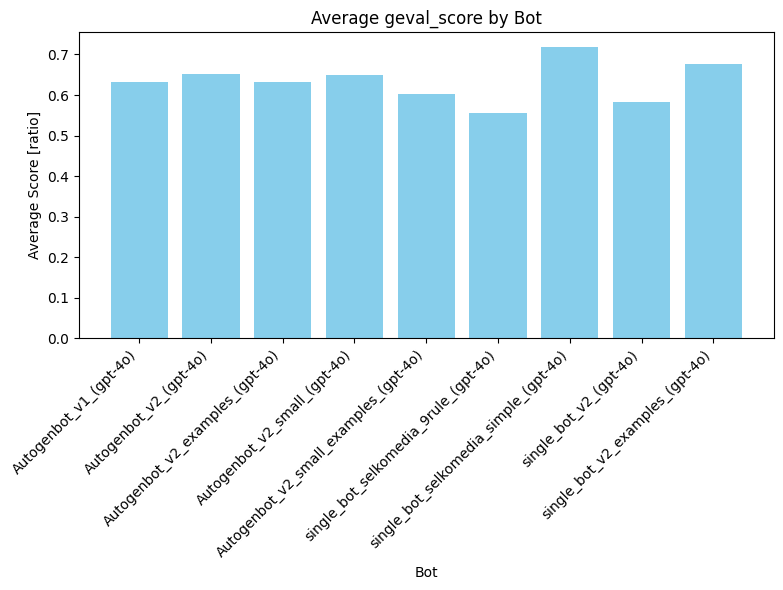

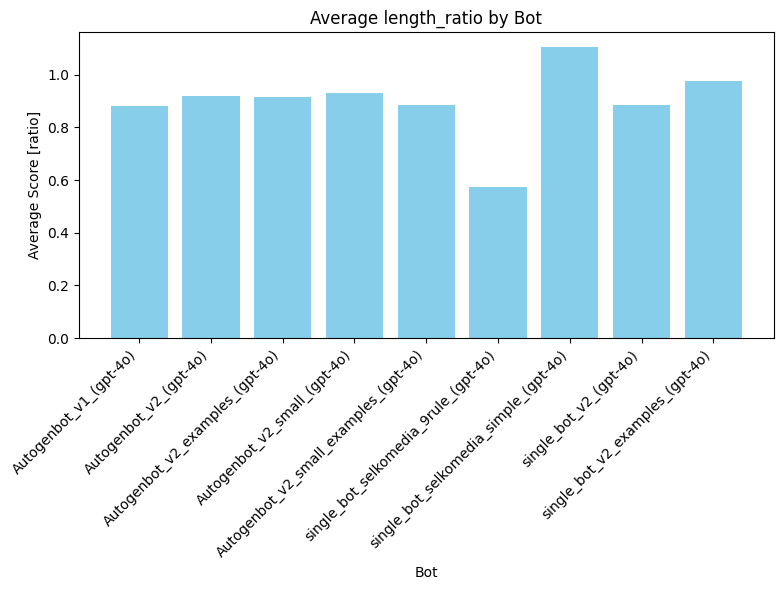

In [142]:
# Group by 'bot' and calculate the mean for each column
grouped_df = df.groupby('bot')[float_columns].mean().reset_index()

# Plotting each score as a separate line plot for comparison across bots
metrics = columns_of_interest

# Creating separate bar plots for each metric
for metric in float_columns:
    plt.figure(figsize=(8, 6))
    if 'embed' in metric:
        y = grouped_df[metric]
        y = y/np.mean(y)
        plt.bar(grouped_df['bot'], y, color='skyblue')
        plt.ylim([0.95,1.05])
    else:
        plt.bar(grouped_df['bot'], grouped_df[metric], color='skyblue')
    plt.xlabel("Bot")
    plt.ylabel("Average Score [ratio]")
    plt.title(f"Average {metric} by Bot")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

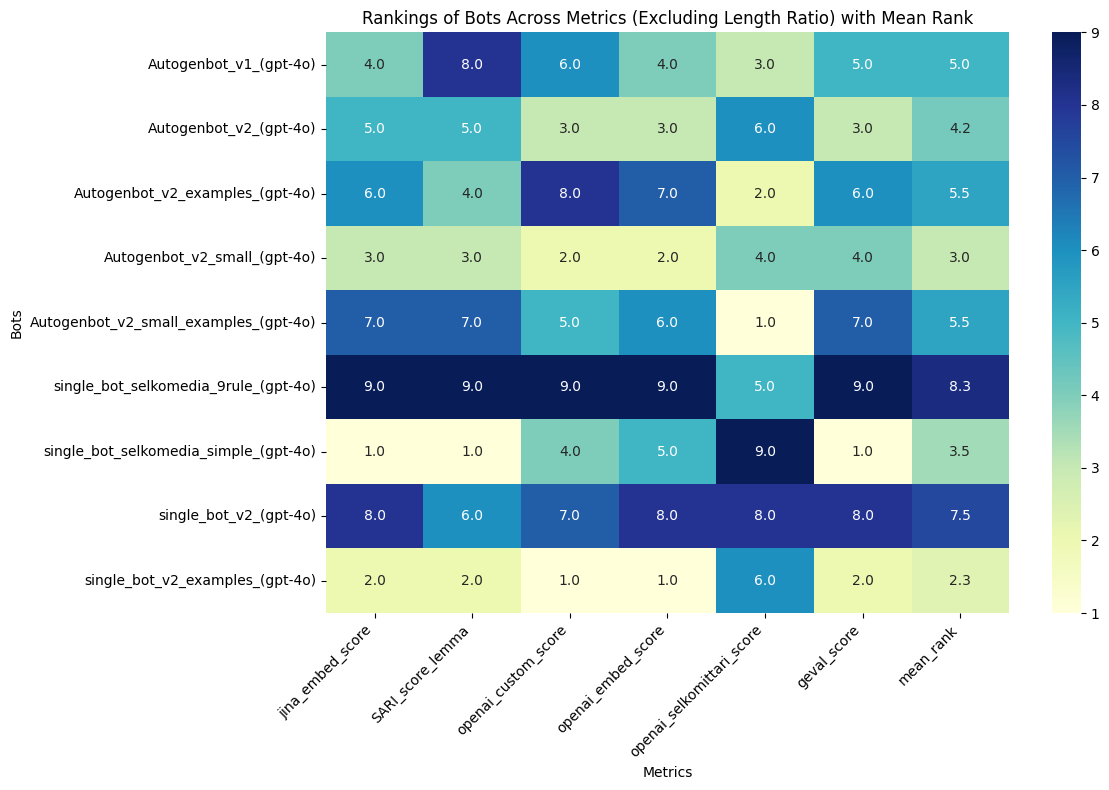

In [143]:
# Rank each bot per metric and convert ranks to integers
# Remove 'length_ratio' from the list of metrics to be ranked
metrics_excluding_length_ratio = [col for col in float_columns if col != "length_ratio"]

# Re-rank the DataFrame without 'length_ratio'
ranked_df = grouped_df[['bot'] + metrics_excluding_length_ratio].copy()
for metric in metrics_excluding_length_ratio:
    ranked_df[metric] = ranked_df[metric].rank(method='min', ascending=False).astype(int)

ranked_df.set_index('bot', inplace=True)
ranked_df['mean_rank'] = ranked_df.mean(axis=1)

# Plot heatmap with ranks excluding 'length_ratio'
plt.figure(figsize=(12, 8))
heatmap=sns.heatmap(ranked_df, annot=True, cmap="YlGnBu", fmt=".1f", cbar=True, cbar_kws={'orientation': 'vertical'})
# Get the colorbar and reverse its ticks
#cbar = heatmap.collections[0].colorbar
#cbar.set_ticks(cbar.get_ticks()[::-1])  # Reverse tick order
plt.title("Rankings of Bots Across Metrics (Excluding Length Ratio) with Mean Rank")
plt.xlabel("Metrics")
plt.ylabel("Bots")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()